# Qiskit

In [427]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [428]:
from qiskit.algorithms import VQE
from qiskit import Aer, IBMQ
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.providers.aer.noise import NoiseModel
from qiskit.algorithms.optimizers import L_BFGS_B, COBYLA

seed = 9999


## preparing the hamiltonian for n quibts (Ising model)

In [429]:
import numpy as np
from qiskit.opflow import Z, I

def create_general_hamiltonian(S,doPrint=0):
  num_qubits = len(S)
  sum = 0
  sigmas_list = []
  for qubit in range(num_qubits):
    if qubit == 0:
       sigma = Z
    else:
       sigma = I
    for i in range(1,num_qubits):
      if i == qubit:
        sigma = sigma^Z
      else:
        sigma = sigma^I
    sigmas_list.append(sigma)  

  for i in range(len(sigmas_list)):
    for j in range(len(sigmas_list)):
      sum += S[i]*S[j]* sigmas_list[i]@sigmas_list[j]
  if doPrint:
    print("========== Ising Model Hamiltonian ==========\n")
    print(sum.to_matrix())
    print()
  return sum

## compute minimal eigenvalue

In [430]:
from qiskit.circuit.library import EfficientSU2

def minimum_eigenvalue_by_vqe(num_qubits, ansatz_entanglement, optimizer, quantum_instance, hamiltonian,doPrint=0):
    ansatz = EfficientSU2(num_qubits=num_qubits, entanglement=entanglement)
    #ansatz.draw(output='latex', scale=0.5)
    vqe = VQE(ansatz, optimizer, quantum_instance=quantum_instance)
    result = vqe.compute_minimum_eigenvalue(hamiltonian)
    if doPrint:
      print("minimal eigenvalue: ", format(result.eigenvalue,".3f"))
    return result.eigenvalue

## preparing the simulator

In [431]:
def prepare_simulator(simulator_name, optimizer_name, seed, shots=8192):
    algorithm_globals.random_seed = seed
    backend = Aer.get_backend(simulator_name)
    quantum_instance = QuantumInstance(backend=backend, 
                                      shots=shots, 
                                      seed_transpiler=seed, 
                                      seed_simulator=seed
                                      )
    if optimizer_name == "cobyla" or optimizer_name == "COBYLA":
      optimizer = COBYLA(maxiter=60)
    else:
      optimizer = L_BFGS_B(maxiter=60)
    return optimizer, quantum_instance

## define parameters

In [432]:
avg_array_solvable = []
avg_array_unsolvable = []
avg = 0.0
sum = 0
entanglement = "linear"

# solvable sets of 2 quibts

In [433]:
s1 = [1,1]
s2 = [2,2]
s3 = [24,24]
s4 = [0,0]

In [434]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H)

In [435]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H)

In [436]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H)

In [437]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H)

In [438]:
avg = sum / 4.0
avg_array_solvable.append(avg)

# unsolvable sets of 2 quibts

In [439]:
s1 = [0,1]
s2 = [1,2]
s3 = [2,24]
s4 = [23,25]

In [440]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [441]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [442]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H) - 484


In [443]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H) - 4

In [444]:
avg = sum / 4.0
avg_array_unsolvable.append(avg)

# solvable sets of 3 quibts

In [445]:
s1 = [0,1,1]
s2 = [1,3,2]
s3 = [7,4,3]
s4 = [40,20,60]

In [446]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H)

In [447]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H)

In [448]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H)

In [449]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H)

In [450]:
avg = sum / 4.0
avg_array_solvable.append(avg)

# unsolvable sets of 3 quibts

In [451]:
s1 = [1,1,1]
s2 = [1,4,6]
s3 = [13,1,11]
s4 = [21,56,87]

In [452]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [453]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [454]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [455]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H) - 100

In [456]:
avg = sum / 4.0
avg_array_unsolvable.append(avg)

# solvable sets of 4 quibts

In [457]:
s1 = [1,6,2,3]
s2 = [8,2,4,2]
s3 = [14,7,3,4]
s4 = [7,1,5,3]

In [458]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H)

In [459]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H)

In [460]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H)

In [461]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H)

In [462]:
avg = sum / 4.0
avg_array_solvable.append(avg)

# unsolvable sets of 4 quibts

In [463]:
s1 = [1,5,3,2]
s2 = [8,6,4,5]
s3 = [14,7,5,4]
s4 = [7,3,4,3]

In [464]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [465]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H) - 9

In [466]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H) - 4

In [467]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H) - 9

In [468]:
avg = sum / 4.0
avg_array_unsolvable.append(avg)

# solvable sets of 5 quibts

In [469]:
s1 = [2,3,5,4,6]
s2 = [5,3,5,10,3]
s3 = [4,7,3,7,7]
s4 = [1,5,3,4,5]

In [470]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H)

In [471]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H)

In [472]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H)

In [473]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H)

In [474]:
avg = sum / 4.0
avg_array_solvable.append(avg)

# unsolvable sets of 5 quibts

In [475]:
unsolvable_problems_5 = []

In [476]:
s1 = [4,3,5,5,6]
s2 = [5,4,4,10,2]
s3 = [4,7,3,13,2]
s4 = [2,4,4,4,5]

In [477]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H) - 1
unsolvable_problems_5.append(minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H, 1))

minimal eigenvalue:  9.000+0.000j


In [478]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H) - 1
minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H, 1)
unsolvable_problems_5.append(minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H, 1))

minimal eigenvalue:  49.000+0.000j
minimal eigenvalue:  49.000+0.000j


In [479]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H) - 1
minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H, 1)
unsolvable_problems_5.append(minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H, 1))

minimal eigenvalue:  15.726+0.000j
minimal eigenvalue:  5.074+0.000j


In [480]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H) - 1
minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H, 1)
unsolvable_problems_5.append(minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H, 1))

minimal eigenvalue:  9.000+0.000j
minimal eigenvalue:  1.274+0.000j


In [481]:
avg = sum / 4.0
avg_array_unsolvable.append(avg)

# solvable sets of 6 quibts

In [482]:
s1 = [4,5,3,4,4,4]
s2 = [7,5,7,9,9,1]
s3 = [8,1,2,5,1,5]
s4 = [4,7,4,5,5,5]

In [483]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H)

In [484]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H)

In [485]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H)

In [486]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H)

In [487]:
avg = sum / 4.0
avg_array_solvable.append(avg)

# unsolvable sets of 6 quibts

In [488]:
s1 = [3,6,3,4,5,4]
s2 = [6,5,8,9,8,1]
s3 = [7,2,2,6,2,4]
s4 = [6,7,2,5,4,5]

In [489]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [490]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [491]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [492]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [493]:
avg = sum / 4.0
avg_array_unsolvable.append(avg)

# solvable sets of 7 quibts

In [494]:
s1 = [4,5,4,5,4,8,6]
s2 = [7,3,7,4,4,4,5]
s3 = [8,1,2,5,6,6,4]
s4 = [5,3,4,5,12,4,1]

In [495]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H)

In [496]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H)

In [497]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H)

In [498]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H)

In [499]:
avg = sum / 4.0
avg_array_solvable.append(avg)

# unsolvable sets of 7 quibts

In [500]:
s1 = [0,0,0,0,0,0,2]
s2 = [1,2,3,4,10,1,0]
s3 = [7,4,7,4,11,11,1]
s4 = [5,3,4,6,16,1,2]

In [501]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H) - 4

In [502]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [503]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [504]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [505]:
avg = sum / 4.0
avg_array_unsolvable.append(avg)

# solvable sets of 8 quibts

In [506]:
s1 = [1,0,0,0,0,0,2,1]
s2 = [1,2,3,4,10,0,0,0]
s3 = [5,6,7,8,11,11,1,3]
s4 = [5,3,4,2,10,1,1,2]

In [507]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H)

In [508]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H)

In [509]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H)

In [510]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H)

In [511]:
avg = sum / 4.0
avg_array_solvable.append(avg)

# unsolvable sets of 8 quibts

In [512]:
s1 = [1,0,0,0,1,0,2,1]
s2 = [1,2,3,4,11,0,2,2]
s3 = [5,9,4,8,10,11,1,3]
s4 = [6,2,4,2,9,1,1,2]

In [513]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [514]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [515]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [516]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [517]:
avg = sum / 4.0
avg_array_unsolvable.append(avg)

# solvable sets of 9 quibts

In [518]:
s1 = [1,6,2,0,1,2,6,2,0]
s2 = [4,1,0,6,4,6,4,3,2]
s3 = [2,1,0,4,5,7,3,1,1]
s4 = [3,9,1,8,3,12,4,8,0]

In [519]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H)

In [520]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H)

In [521]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H)

In [522]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H)

In [523]:
avg = sum / 4.0
avg_array_solvable.append(avg)

# unsolvable sets of 9 quibts

In [524]:
s1 = [2,8,4,11,3,7,5,7,0]
s2 = [2,0,6,3,5,1,4,1,3]
s3 = [3,2,1,2,4,6,5,3,5]
s4 = [2,5,2,0,1,2,6,3,0]

In [525]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [526]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [527]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [528]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [529]:
avg = sum / 4.0
avg_array_unsolvable.append(avg)

# solvable sets of 10 quibts

In [530]:
s1 = [8,2,5,1,0,2,4,3,2,5]
s2 = [6,8,4,2,9,5,5,9,6,4]
s3 = [5,8,1,3,2,6,4,3,3,3]
s4 = [6,4,3,0,8,10,6,4,1,0]

In [531]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H)
minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H,1)

minimal eigenvalue:  6.556+0.000j


(6.5562587019437615+0j)

In [532]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H)
minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H,1)

minimal eigenvalue:  61.699+0.000j


(61.69931256283371+0j)

In [533]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H)
minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H,1)

minimal eigenvalue:  14.511+0.000j


(14.511332394220123+0j)

In [534]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H)
minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H,1)

minimal eigenvalue:  34.248+0.000j


(34.2476868982815+0j)

In [535]:
avg = sum / 4.0
avg_array_solvable.append(avg)

# unsolvable sets of 10 quibts

In [536]:
s1 = [7,3,2,4,0,2,4,3,1,5]
s2 = [5,9,4,2,9,5,5,8,6,4]
s3 = [6,7,1,3,2,6,4,3,2,3]
s4 = [5,5,2,1,8,9,6,4,1,0]

In [537]:
sum = 0
H = create_general_hamiltonian(s1)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s1), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [538]:
H = create_general_hamiltonian(s2)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s2), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [539]:
H = create_general_hamiltonian(s3)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s3), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [540]:
H = create_general_hamiltonian(s4)
bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
sum += minimum_eigenvalue_by_vqe(len(s4), entanglement, bfgs_optimizer, quantum_instance, H) - 1

In [541]:
avg = sum / 4.0
avg_array_unsolvable.append(avg)

# create the graphs

# solvable problems deviation from the desired result

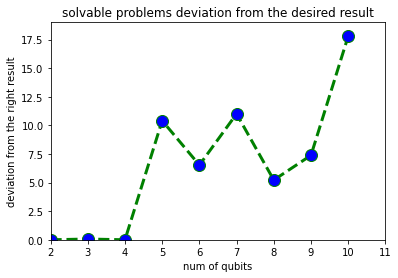

range(2, 11)
[(1.9631025e-13+0j), (0.06862537234574569+0j), (8.490394818125e-08+0j), (10.40712757343533+0j), (6.530812267868924+0j), (11.006709207305542+0j), (5.222138789141066+0j), (7.381297664153868+0j), (17.786268058749883+0j)]


In [542]:
import matplotlib.pyplot as plt
  
# y axis values
y = avg_array_solvable
# corresponding x axis values
x = range(2,11)
  
# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  
# setting x and y axis range
plt.ylim(0,19)
plt.xlim(2,11)
  
# naming the x axis
plt.xlabel('num of qubits')
# naming the y axis
plt.ylabel('deviation from the right result')
  
# giving a title to my graph
plt.title('solvable problems deviation from the desired result')
  
# function to show the plot
plt.show()
print(x)
print(y)

# unsolvable problems deviation from the desired result

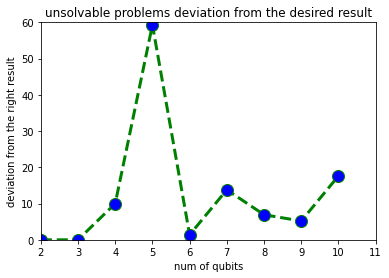

range(2, 11)
[(8.427147868417251e-13+0j), (0.00014536456180730406+0j), (10.000029620053416+0j), (59.297793458885174+0j), (1.388265941130446+0j), (13.786266079899764+0j), (6.921850704438349+0j), (5.188829667019833+0j), (17.6113242983348+0j)]


In [543]:
import matplotlib.pyplot as plt
  
# y axis values
y = avg_array_unsolvable
# corresponding x axis values
x = range(2,11)
  
# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  
# setting x and y axis range
plt.ylim(0,60)
plt.xlim(2,11)
  
# naming the x axis
plt.xlabel('num of qubits')
# naming the y axis
plt.ylabel('deviation from the right result')
  
# giving a title to my graph
plt.title('unsolvable problems deviation from the desired result')
  
# function to show the plot
plt.show()
print(x)
print(y)